In [1]:
from numpy import *
from pandas import *

ser = Series([1, 3, 5, 7, 9])
ser.values
ser.index

data = random.randint(0, 10, 5)
index = ['a', 'b', 'c', 'd', 'e']
series = Series(data=data, index=index, name='series_from_ndarray')
series

data = {
    '서울' : 70000,
    '부산' : 52000,
    '대전' : 35000,
    '광주' : 40000,
    '제주도' : 28000
}

series = Series(data=data)
series

city = ['광주', '대전', '부산', '서울', '울릉도']
series = Series(data=data,index=city, name = 'series_from_dic')
series.name

series_to_list = series.tolist()
series
series_to_list

data = {
    '도시' : ['서울', '서울', '서울', '부산', '부산', '부산'],
    '연도' : [2020, 2019, 2018, 2020, 2019, 2018],
    '인구수': [15865, 15964, 16034, 4342, 4382, 4416]
}

frame = DataFrame(data)
frame

fram = DataFrame(data, columns=['연도', '도시', '인구수'])
fram

data = {
    '컬럼1' : Series(data = random.randint(10, 100, 5), index = ['가', '나', '다', '라', '마']),
    '컬럼2' : Series(data = random.randint(10, 100, 5), index = ['가', '나', '다', '라', '마']),
    '컬럼3' : Series(data = random.randint(10, 100, 5), index = ['가', '나', '다', '라', '마']),
}



- 데이터 프레임을 생성할 수 있는 자료형
  - 2차원 ndarray
  - 배열, 리스트, 튜플을 담은 딕셔너리
  - 시리즈를 담은 딕셔너리
  - 딕셔너리나 시리즈에 담긴 리스트
  - 리스트나 튜플에 담긴 리스트
  - 다른 데이터프레임


# 2. 판다스 데이터 타입

- object: 파이썬 객체형
- string: 문자형 데이터 타입
- int64: 넘파이의 부호가 있는 정수형과 동일
- float64: 넘파이의 부동소수점(실수)형과 동일
- bool: True, False 값을 갖는 불리언형
- category: 범주형 데이터 타입, 순서 혹은 레벨을 가질 수도 있음
- datetime64: 시간대가 있는 datetime 데이터를 위한 확장형 데이터 타입, 날짜값과 시간값이 있음
- timedelta: 2개 datatime의 사잇값 또는 차잇값을 표현하는 데이터 타입

# 3. 데이터 로드와 저장
* 외부 데이터 셋 불러오기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = read_csv('/content/drive/MyDrive/빅분/example_1.csv')
df

,a,b,c,d,e,keyword
0,1,2,3,4,5,Hello
1,11,12,13,14,15,Good
2,21,22,23,24,25,Nice
3,31,32,33,34,35,Beautiful
4,41,42,43,44,45,GoGo


In [4]:
read_table('/content/drive/MyDrive/빅분/example_1.csv')
read_table('/content/drive/MyDrive/빅분/example_1.csv', sep = ",")

,a,b,c,d,e,keyword
0,1,2,3,4,5,Hello
1,11,12,13,14,15,Good
2,21,22,23,24,25,Nice
3,31,32,33,34,35,Beautiful
4,41,42,43,44,45,GoGo


In [5]:
# 컬럼명 항목이 없는 데이터 로드하기
# csv 파일 불러오기

read_csv('/content/drive/MyDrive/빅분/example_2.csv')

# 헤더 영역에 데이터 들어간 거 설정해주기

read_csv('/content/drive/MyDrive/빅분/example_2.csv', header = None)

# 컬럼 이름 지정해주기

read_csv('/content/drive/MyDrive/빅분/example_2.csv', names=['a', 'b', 'c', 'd', 'e'])

# 특정 컴럼을 인덱스로 지정해서 로드하기

col_name = ['a', 'b', 'c', 'd', 'e', 'f']
read_csv('/content/drive/MyDrive/빅분/example_2.csv', names= col_name)

,a,b,c,d,e,f
0,1,2,3,4,5,Hello
1,11,12,13,14,15,Good
2,21,22,23,24,25,Nice
3,31,32,33,34,35,Beautiful
4,41,42,43,44,45,GoGo


In [6]:
# 일부 행을 건너뛰고 데이터 로드하기

read_csv('/content/drive/MyDrive/빅분/example_1.csv', skiprows=[0, 2])

read_csv('/content/drive/MyDrive/빅분/example_3.csv', skiprows=[0, 2])


,one,1,2,3,4,5,Hello
0,three,NaN,22.0,23.0,24,25,Nice
1,four,31.0,32.0,NaN,34,35,Beautiful
2,five,41.0,NaN,43.0,44,45,NaN


In [7]:
na_data = read_csv('/content/drive/MyDrive/빅분/example_1.csv')
isna(na_data)

na_data = read_csv('/content/drive/MyDrive/빅분/example_1.csv', na_values=["Null", 'NaN', "one", 'two'])


In [8]:
# 인코딩 관련 에러 대응

# 1. read_csv(engine = 'python)

# read_csv('/content/drive/MyDrive/빅분/서울시_지하철호선별_역별_승하차수.csv' , engine=
#          'python')

# 2. encoidng = 'ep949', 'utf-8', 'utf-8-sig', 'euc-kr'

read_csv('/content/drive/MyDrive/빅분/서울시_지하철호선별_역별_승하차수.csv', encoding='euc-kr')


,사용일자,호선명,역명,승차총승객수,하차총승객수,등록일자
0,20210527,우이신설선,4.19민주묘지,2711,2708,20210530
1,20210527,경원선,가능,6327,6127,20210530
2,20210527,8호선,가락시장,7602,8441,20210530
3,20210527,3호선,가락시장,8696,8498,20210530
4,20210527,경부선,가산디지털단지,18780,21785,20210530
...,...,...,...,...,...,...
23445,20210419,경원선,회룡,12344,10883,20210422
23446,20210419,4호선,회현(남대문시장),23696,24964,20210422
23447,20210419,경의선,효창공원앞,2889,3155,20210422
23448,20210419,6호선,효창공원앞,6735,6210,20210422


- 인코딩 목록 : https://docs.python.org/3/library/codecs.html#standard-encodings

 - 판다스로 로드 가능한 파싱 함수 목록 : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

# 데이터 프레임 출력 관련 설정

In [9]:
# 디폴트로 출력되는 컬럼과 로우 수를 get_option() 함수로 확인

get_option('display.max_columns')
get_option('display.max_row')

read_csv('/content/drive/MyDrive/빅분/example_wide.csv')

,a,b,c,d,e,f,g,h,i,j,...,r,s,t,u,v,w,x,y,z,keyword
0,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,Hello
1,11,12,13,14,15,16,17,18,19,20,...,28,29,30,31,32,33,34,35,36,Good
2,21,22,23,24,25,26,27,28,29,30,...,38,39,40,41,42,43,44,45,46,Nice
3,31,32,33,34,35,36,37,38,39,40,...,48,49,50,51,52,53,54,55,56,Beautiful
4,41,42,43,44,45,46,47,48,49,50,...,58,59,60,61,62,63,64,65,66,GoGo


In [10]:
# set_option으로 설정

set_option('display.max_columns', 30)
read_csv('/content/drive/MyDrive/빅분/example_wide.csv')

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,keyword
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,Hello
1,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,Good
2,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,Nice
3,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,Beautiful
4,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,GoGo


In [11]:
from seaborn import *

iris = load_dataset('iris')
iris

set_option('display.max_rows', 150)
iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [12]:
set_option('display.max_rows', 60)

# 데이터 프레임을 csv 파일로 저장하는 방법
iris.to_csv('/content/drive/MyDrive/빅분/iris.csv')

# 데이터에 저장된 컬럼명 확인하기
iris.columns

# 원하는 컬럼만 모아서 저장하기
iris.to_csv('/content/drive/MyDrive/빅분/iris_sepal.csv', columns=['sepal_length', 'sepal_width', 'species'])

# 헤더 없이 저장
iris.to_csv('/content/drive/MyDrive/빅분/iris_noheader.csv', header=False)

# 헤더를 원하는 이름으로 저장
iris.to_csv('/content/drive/MyDrive/빅분/iris_headername.csv', header=['꽃받침_길이', '꽃받침_넓이', '꽃입 길이', '꽃잎 넓이', '종류'], encoding = 'cp949')


In [13]:
read_csv('/content/drive/MyDrive/빅분/iris_headername.csv', encoding = "cp949")

iris.to_csv('/content/drive/MyDrive/빅분/iris_noidexheadername.csv', index = False)

read_csv('/content/drive/MyDrive/빅분/iris_noidexheadername.csv')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [14]:
# 파일을 엑셀 파일로 저장하기

iris.to_excel('/content/drive/MyDrive/빅분/iris.xlsx')

In [15]:
df = load_dataset('penguins')
df.head(10)
df.tail(10)

len(df)
df.shape

df.dtypes

# 자동으로 데이터 타입 변경하기
# object로 추로된 속성 자동을 데이터 타입 변경
# 100%로는 아님

df = df.convert_dtypes()
df.dtypes

df.columns

# 사용자가 직접 데이터 자료형 변경(수동)

df = df.astype({
    'species' : 'category'
})
df = df.astype({
    'island' : 'category'
})
df = df.astype({
    'sex' : 'category'
})

# df = df.astype({
#     'species' : 'category',
#     'island' : 'category',
#     'sex' : 'category'
# })'

# 사용자가 직접 데이터 자료형 변경2
df['species'] = df['species'].astype('category')
df['island'] = df['island'].astype('category')
df['sex'] = df['sex'].astype('category')

* 유의사항: 결측값(NaN, Null)이 있는 경우 에러가 발생하기도 한다, 그럴때는 결측값을 처리하고 데이터 형변환을 해줘야 한다

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   bill_length_mm     342 non-null    Float64 
 3   bill_depth_mm      342 non-null    Float64 
 4   flipper_length_mm  342 non-null    Int64   
 5   body_mass_g        342 non-null    Int64   
 6   sex                333 non-null    category
dtypes: Float64(2), Int64(2), category(3)
memory usage: 13.6 KB


In [17]:
df = load_dataset('penguins')
df.describe()

df.describe(include='all')

df.describe(include='object')
# count는 갯수, 단 null 제외
# unique는 중복제외 숫자
# top은 가장 많이 나온 값
# freq는 top의 빈도수

df["sex"].isnull() == True
df[df['sex'].isnull() == True]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [18]:
# 백분위 수 구하기
# 결측치 값 0으로 채우기

df = df.fillna(0)
df

point5 = percentile(df['bill_depth_mm'], q = [0, 25, 50, 75, 100])
point5

df.quantile([0, .25, .50, .75, 1.0])
df['bill_depth_mm'].quantile(.25)

<ipython-input-18-1795c5356cad>:10: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile([0, .25, .50, .75, 1.0])


15.5

In [19]:
# 개수 파악하기
df.count()

df.count(axis="columns")
df.count(axis=1) # 0이 행 1이 열

# 최대값
# 문자열 기준 최대값은 문자열 기준 오름차순에서 가장 뒤에 값
df.max()

# 최소값
# 문자열 기준 최대값은 문자열 기준 오름차순에서 가장 앞에 값
df.min()

df["bill_length_mm"].max()
df["bill_length_mm"].min()

## 최대값이 몇 번째 행에 위치했는지
df["bill_length_mm"].idxmax()

# 최소값 확인하기 위해 데이터 다시 로드해주기
df = load_dataset("penguins")
df.min()


df["species"].unique()
df["island"].unique()
df["bill_length_mm"].min()

## 최소값이 몇 번째 행에 위치했는지
df["bill_length_mm"].min()

# 평균값 계산
df.mean()

# 표준 편차
df.std()

# 합계
# 문자열을 다 연결해서 나열
df.sum()

<ipython-input-19-6124fdeca6ff>:9: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.max()
<ipython-input-19-6124fdeca6ff>:13: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.min()
<ipython-input-19-6124fdeca6ff>:23: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.min()
<ipython-input-19-6124fdeca6ff>:34:

species              AdelieAdelieAdelieAdelieAdelieAdelieAdelieAdel...
island               TorgersenTorgersenTorgersenTorgersenTorgersenT...
bill_length_mm                                                 15021.3
bill_depth_mm                                                   5865.7
flipper_length_mm                                              68713.0
body_mass_g                                                  1437000.0
dtype: object

<Axes: xlabel='island', ylabel='count'>

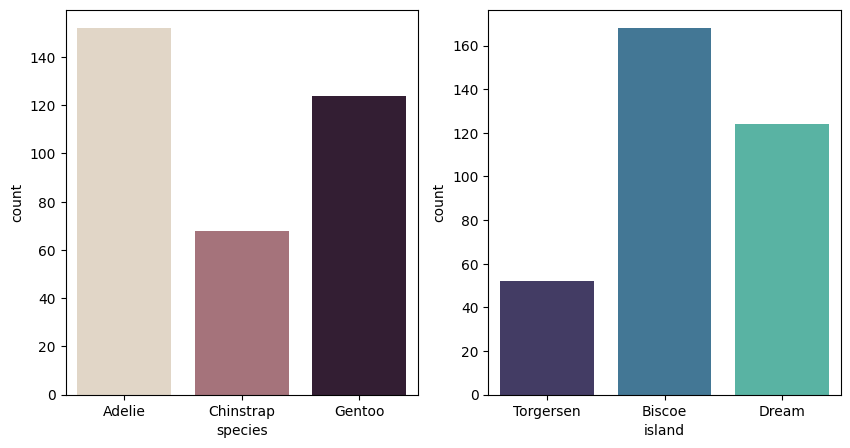

In [20]:
from matplotlib.pyplot import *

figure(figsize=(10, 5))
subplot(121) # subplot 행열 순서
countplot(data=df, x="species", palette="ch: .25")
subplot(122)
countplot(data=df, x="island", palette="mako")

<Axes: xlabel='island', ylabel='bill_length_mm'>

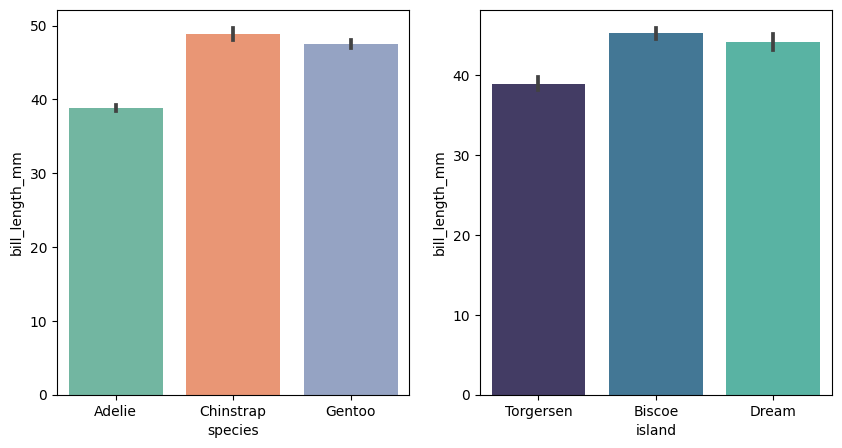

In [21]:
df.columns

fig, ax = subplots(ncols = 2, figsize= (10, 5))
barplot(data = df, x = "species", y = "bill_length_mm", palette="Set2", ax = ax[0])
barplot(data = df, x = "island", y = "bill_length_mm", palette="mako", ax = ax[1])

<Axes: xlabel='body_mass_g', ylabel='Count'>

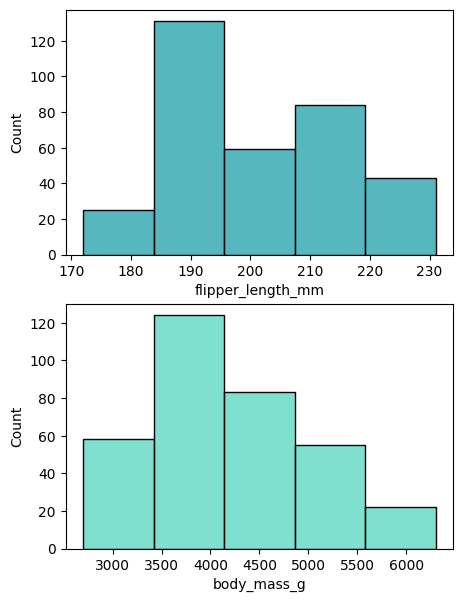

In [22]:
# value_counts() 내림차순으로 정렬이 된다
df["island"].value_counts()

# 전체 값 1로 가정하여 비율 계산
df["island"].value_counts(normalize = True)

# bins는 구간을 몇개로 나눌 건지
df["flipper_length_mm"].value_counts(bins = 7).sort_index(ascending = False)

figure(figsize = (5, 7))
subplot(211)
histplot(data = df, x = "flipper_length_mm", color = "#1e9faa", bins = 5)
subplot(212)
histplot(data = df, x = "body_mass_g", color = "#54d6c1", bins = 5)

# 여기 집중적

# 5. 컬럼 다루기

In [23]:
# 컬럼 목록 확인하기
df.columns

# 컬럼 호출하기
df[["species"]]

# 여러개의 컬럼을 호출하는 경우
df[["species", "bill_length_mm"]]

# 변수에 저장하여 호출하기
columns = ["species", "bill_length_mm"]
df[columns]

# 2개 이상을 결합하여 새로운 변수에 담아서 새로운 데이터 생성
new_df = df[columns]
new_df

# 새로운 컬럼 생성하기
# 단일 컬럼 생성하기
df["bill_depth_cm"] = df["bill_length_mm"] / 10
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_depth_cm
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,3.91
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,3.95
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,4.03
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,3.67


In [24]:
df.columns
# 다중 컬럼 동시에 생성하기
df = df.assign(
    bill_length_cm = df["bill_length_mm"] / 10,
    bill_depth_cm = df["bill_depth_mm"] / 10
)

df

# 동일한 데이터 타입의 컬럼만 선택하기
df.select_dtypes(include = ["float64"]).columns
df.select_dtypes(exclude = ["float64"]).columns

df = load_dataset("penguins")

# 컬럼과 로우 삭제하기
# axis = 0 행(row), 1 열(column)

df.drop("species", axis = 1).head()

# 삭제한 데이터 적용하기 1
df = df.drop("species", axis = 1)

# 다시 불러오기
df = load_dataset("penguins")

# 삭제한 데이터 적용하기 2
df.drop("species", axis = 1, inplace = True)

df = load_dataset("penguins")
df.columns

df.drop(["species", "flipper_length_mm"], axis = 1).head()

# 로우 삭제하기(행)
df.drop([0, 3, 5], axis = 0).head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male


In [25]:
# 컬럼 이름 변경하기
# 딕셔너리 형태로 1:1 이름 변경

df.rename(columns = {
      "species" : "펭귄 종류",
      "island" : "서식하는 섬",
      "bill_length_mm" : "부리 길이"
      }).head()

# columns 함수를 이용하여 컬럼 이름 변경

df.columns = [
    "펭귄 종류",
    "서식하는 섬",
    "부리 길이",
    "부리 깊이",
    "날개 길이",
    "몸무게",
    "성별"
    ]
df

# 컬럼 순서/위치 변경하기 (이름이 같으면 값도 같이 순서를 바꿈)
df = load_dataset("penguins")
df = df[['species', 'body_mass_g', 'island',  'bill_depth_mm', 'bill_length_mm',
       'flipper_length_mm', 'sex']]

df = load_dataset("penguins")

# 컴럼 이름만 바뀌고 값은 안 바뀜
df.columns = df.columns[[0 , 1, 6, 2, 3, 4, 5]]
df


df = load_dataset("penguins")
df.columns

# for, if 문을 사용해서 일부 컬럼 이동시키기

cols_to_stay = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
cols = cols_to_stay + [i for i in df if i not in cols_to_stay]

df[cols]

cols_to_stay = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
cols = [i for i in df if i not in cols_to_stay] + cols_to_stay

df[cols]

# 컬럼과 인덱스 교환하기
df = df[:11].transpose()
df

df[:11].T

# 데이터 인덱싱
df.loc["bill_length_mm"]

# 2개 이상의 문자형 인덱스에 접근하는 법
df.loc[["bill_length_mm", "sex"]]

df.loc["bill_length_mm", 5]

# 인덱스 연속된 구간에 해당하는 복수 인덱스 선택
df.loc["island":"bill_depth_mm", 7]

island            Torgersen
bill_length_mm         39.2
bill_depth_mm          19.6
Name: 7, dtype: object

In [26]:
# 컬럼 기준으로 인덱싱
df = df.T

In [27]:
df[df["bill_length_mm"] > 40]
df.loc[df["bill_length_mm"] > 40, ["sex"]]

# 성별이 Male인 데이터만 출력해보세요
df[df["sex"] == "Male"]

# 값 변경하기
df.loc[[1, 3], ["bill_length_mm"]] = 50

df.loc[:, ["bill_length_mm"]] = 10

# flipper_length_mm이 190을 초과하면 0으로 바꿔줌
df[df["flipper_length_mm"] > 190] = 0

- 멀티 인덱스 접근하는 방법


https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html

In [28]:
# 위치 기반 인덱싱하기
# loc는 라벨 기준, i loc는 위치 기반 정수 인덱싱

df = load_dataset("penguins")
df.iloc[[0]]
df.iloc[[0, 2]]
df.iloc[:3]

df.loc[:3]

df.iloc[0, 1]

df.iloc[[0, 2], [1, 3]]

# iloc 1:3 == 1, 2, :3 0~2까지 오는것
# loc 1:3 == 1, 2, 3, :3 0, 1, 2, 3

df.iloc[1:3, :3]

# 컬럼을 인덱스로 만들기, 재정의하기
# 특정 컬럼의 값으로 인덱스를 만들 때는 set_index 함수를 활용
# species를 인덱스로 만들기
df.set_index("species", inplace = True)

# 컬럼을 잘못 지정해서 인덱스를 기존처럼 돌려야 할 때는?
df.reset_index(inplace = True)

df.set_index("species", inplace = True)
df.reset_index(drop = True, inplace = True)